<a href="https://colab.research.google.com/github/rituparrna33/wholefoodsmarket-basket-analysis/blob/main/market_Basket_Analysis_Whole_Foods_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv

In [22]:
#user authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [23]:
from google.colab import  drive
drive.mount('/content/gdrive')

# from google.colab import files
os.chdir('/content/gdrive/MyDrive')
os.listdir()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['doran',
 'Untitled presentation (1).gslides',
 'cfd',
 'image.jpg',
 'Proctored Mock Cat 1 - Solutions.pdf',
 'Proctored Mock Cat 1.pdf',
 'Proctored Mock Cat 2 - Solutions.pdf',
 'Proctored Mock Cat 2.pdf',
 'Proctored Mock Cat 3 - Solutions.pdf',
 'Proctored Mock Cat 3.pdf',
 'Proctored Mock Cat 4 - Solutions.pdf',
 'Proctored Mock Cat 5 - Solutions.pdf',
 'Proctored Mock Cat 4.pdf',
 'Proctored Mock Cat 6 - Solutions.pdf',
 'Proctored Mock Cat 5.pdf',
 'Proctored Mock Cat 6.pdf',
 'Proctored Mock Cat 7 - Solutions.pdf',
 'Proctored Mock Cat 7.pdf',
 'Proctored Mock Cat 8 - Solutions.pdf',
 'Unproctored Mock Cat 1 - Solutions.pdf',
 'Proctored Mock Cat 8.pdf',
 'Unproctored Mock Cat 1.pdf',
 'Unproctored Mock Cat 10 - Solutions.pdf',
 'Unproctored Mock Cat 10.pdf',
 'Unproctored Mock Cat 2.pdf',
 'Unproctored Mock Cat 4 - Solutions.pdf',
 'Unproctored Mock Cat 2 - Solutions.pdf',
 'Unproctored Mock Cat 4.pdf',
 'Unproctored Mock Cat 7 - Solutions.pdf',
 'Unproctored Mock Cat 7.pdf'

In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [25]:
df=pd.read_csv('whole_foods_transactions.csv')

In [26]:
df.head(5)

,TransactionID,Date,Product,Category,Quantity,Unit,Price_Paid,Original_Price,Promotion_Applied
0,T001,2026-02-16,Organic Baby Broccoli,Produce,1.00,each,3.00,3.99,0.99
1,T001,2026-02-16,Gold Potato,Produce,1.78,lb,2.65,2.65,0.00
2,T001,2026-02-16,Grapes Small,Produce,0.76,lb,4.25,5.31,1.06
3,T001,2026-02-16,365 Reduced Fat 2% Milk,Dairy,1.00,each,2.89,2.89,0.00
4,T001,2026-02-16,Chocolate Eruption Cake,Bakery,1.00,each,26.99,26.99,0.00


In [27]:
df.describe()

,Quantity,Price_Paid,Original_Price,Promotion_Applied
count,313.000000,313.000000,313.000000,313.000000
mean,1.083259,5.980703,6.281022,0.300319
std,0.491393,4.881280,4.982867,0.765235
min,0.100000,0.000000,0.000000,0.000000
25%,1.000000,2.990000,3.380000,0.000000
50%,1.000000,4.680000,4.990000,0.000000
75%,1.000000,7.080000,7.490000,0.000000
max,4.170000,29.240000,29.240000,5.020000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      313 non-null    object 
 1   Date               313 non-null    object 
 2   Product            313 non-null    object 
 3   Category           313 non-null    object 
 4   Quantity           313 non-null    float64
 5   Unit               313 non-null    object 
 6   Price_Paid         313 non-null    float64
 7   Original_Price     313 non-null    float64
 8   Promotion_Applied  313 non-null    float64
dtypes: float64(4), object(5)
memory usage: 22.1+ KB


In [29]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# ============================================
# DATA PREPROCESSING
# ============================================

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.quarter
df['DayOfWeek'] = df['Date'].dt.day_name()

# Create Week of Year for seasonality
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

print("Dataset Overview:")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Transactions: {df['TransactionID'].nunique()}")
print(f"Total Line Items: {len(df)}")
print(f"Total Spend: ${df['Price_Paid'].sum():,.2f}")

Dataset Overview:
Date Range: 2025-04-02 00:00:00 to 2026-02-16 00:00:00
Total Transactions: 21
Total Line Items: 313
Total Spend: $1,871.96


In [30]:
# ============================================
# CREATE COMPLETE DATE RANGE (CRITICAL FIX)
# ============================================

# Get min and max dates
min_date = df['Date'].min()
max_date = df['Date'].max()

# Create complete monthly range
date_range = pd.period_range(start=min_date, end=max_date, freq='M')
complete_months = pd.DataFrame({'YearMonth': date_range})

print(f"\n📅 Date Continuity Check:")
print(f"First Transaction: {min_date.strftime('%Y-%m-%d')}")
print(f"Last Transaction: {max_date.strftime('%Y-%m-%d')}")
print(f"Expected Months: {len(complete_months)}")
print(f"Months with Transactions: {df['YearMonth'].nunique()}")
print(f"Missing Months: {len(complete_months) - df['YearMonth'].nunique()}")



📅 Date Continuity Check:
First Transaction: 2025-04-02
Last Transaction: 2026-02-16
Expected Months: 11
Months with Transactions: 9
Missing Months: 2


In [31]:
months_with_transactions = df['YearMonth'].unique()
missing_months = complete_months[~complete_months['YearMonth'].isin(months_with_transactions)]

if not missing_months.empty:
    print("Months with no recorded transactions:")
    for month in missing_months['YearMonth']:
        print(month.strftime('%Y-%m'))
else:
    print("All months in the range have recorded transactions.")

Months with no recorded transactions:
2025-06
2025-09


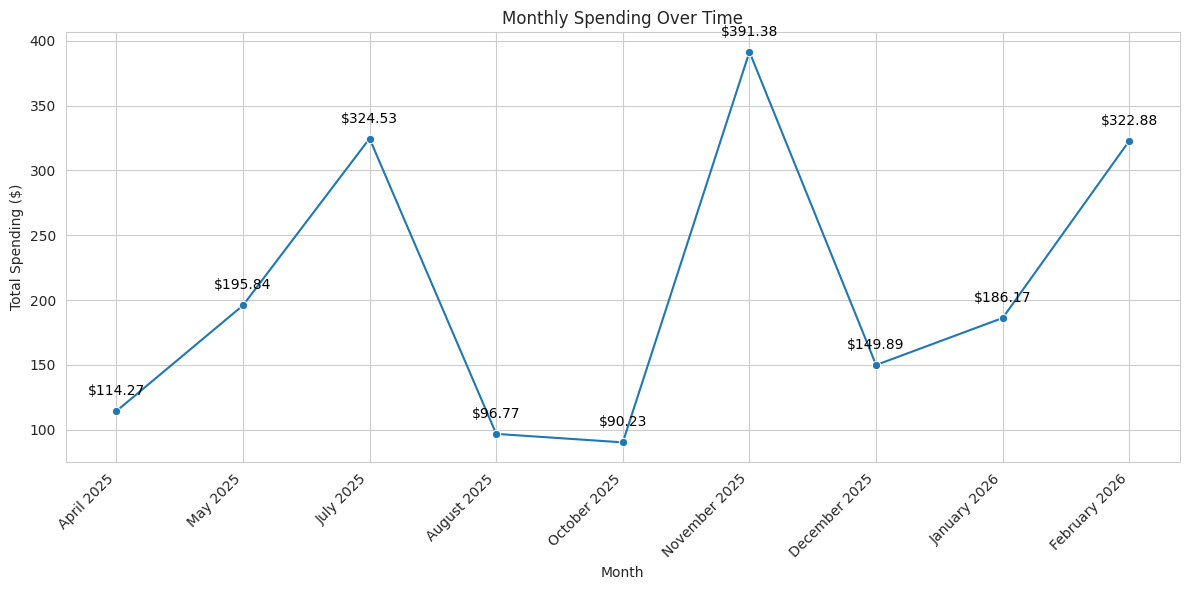

In [32]:
# Calculate monthly spending
monthly_spending = df.groupby('YearMonth')['Price_Paid'].sum().reset_index()

# Convert YearMonth to full month name for better readability on the plot
monthly_spending['YearMonth'] = monthly_spending['YearMonth'].dt.strftime('%B %Y')

# Plot monthly spending over time
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='YearMonth', y='Price_Paid', data=monthly_spending, marker='o')
plt.title('Monthly Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spending ($)')

# Add total spend on top of each month
for index, row in monthly_spending.iterrows():
    ax.text(row['YearMonth'], row['Price_Paid'] + 10, f"${row['Price_Paid']:.2f}", color='black', ha="center", va="bottom", fontsize=10)

plt.xticks(rotation=45, ha='right') # Rotate and align for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

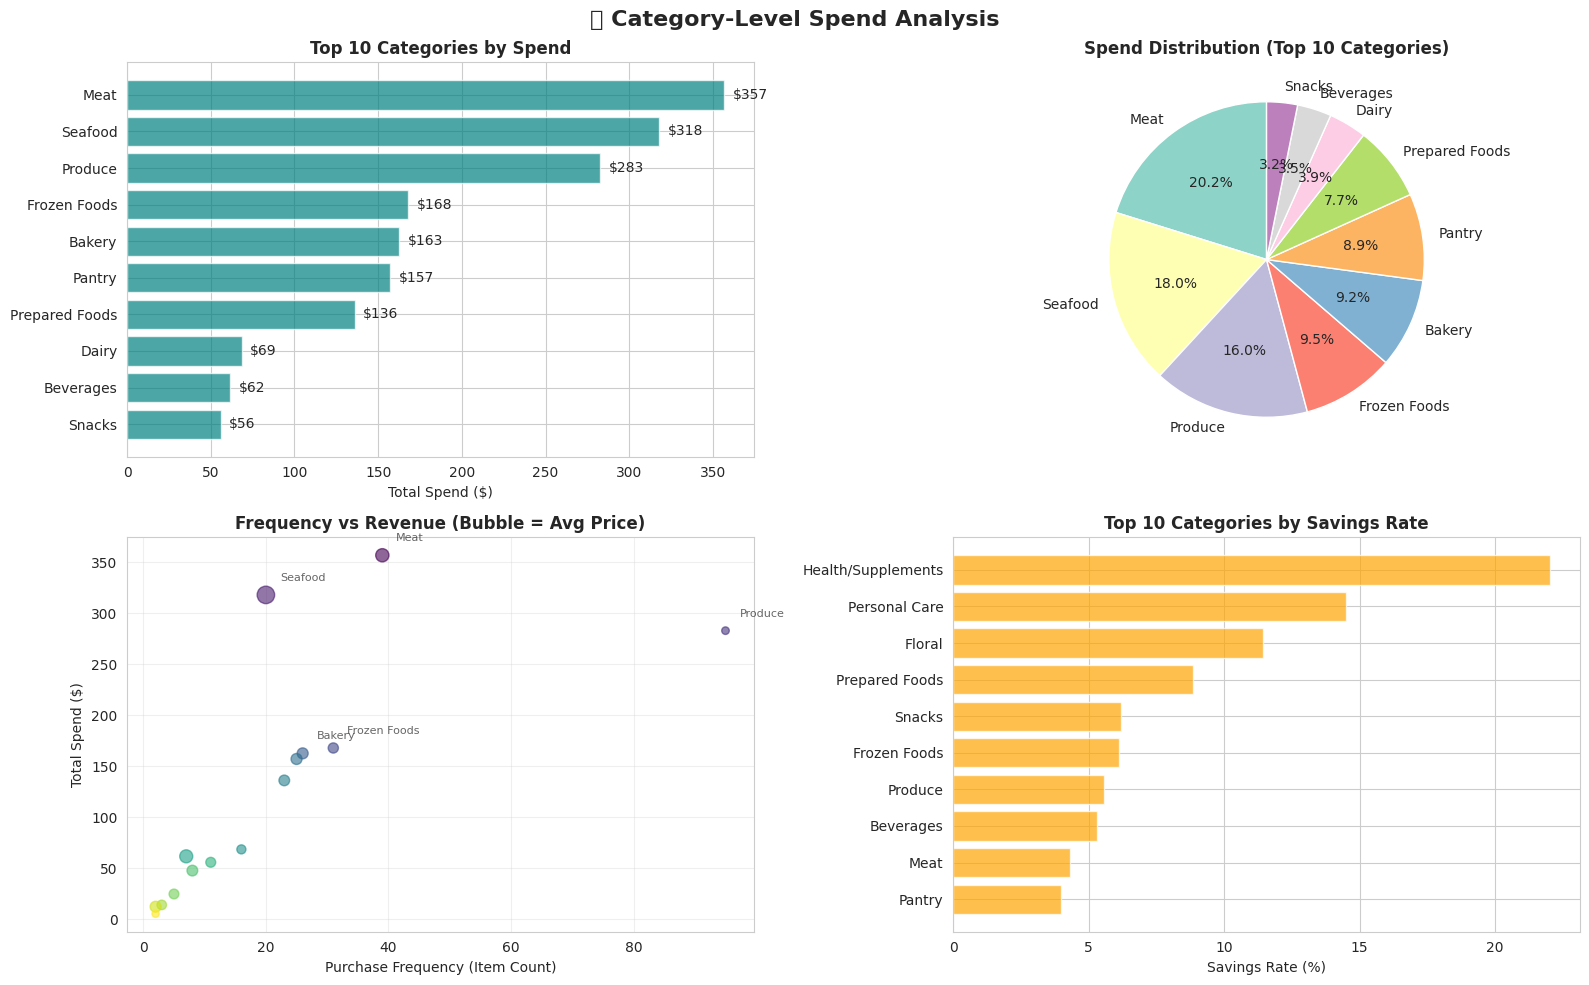


📦 Category Spend Breakdown:
          Category  Total_Spend  Avg_Item_Price  Item_Count  Total_Savings  Num_Transactions  Spend_Pct  Savings_Rate
              Meat       356.69        9.145897          39          16.05                18  19.054360      4.305951
           Seafood       317.85       15.892500          20           9.42                15  16.979529      2.878357
           Produce       282.82        2.977053          95          16.68                21  15.108229      5.569282
      Frozen Foods       167.89        5.415806          31          10.98                18   8.968675      6.138536
            Bakery       162.62        6.254615          26           1.00                17   8.687151      0.611172
            Pantry       157.11        6.284400          25           6.51                13   8.392808      3.978731
    Prepared Foods       136.12        5.918261          23          13.20                17   7.271523      8.840075
             Dairy        6

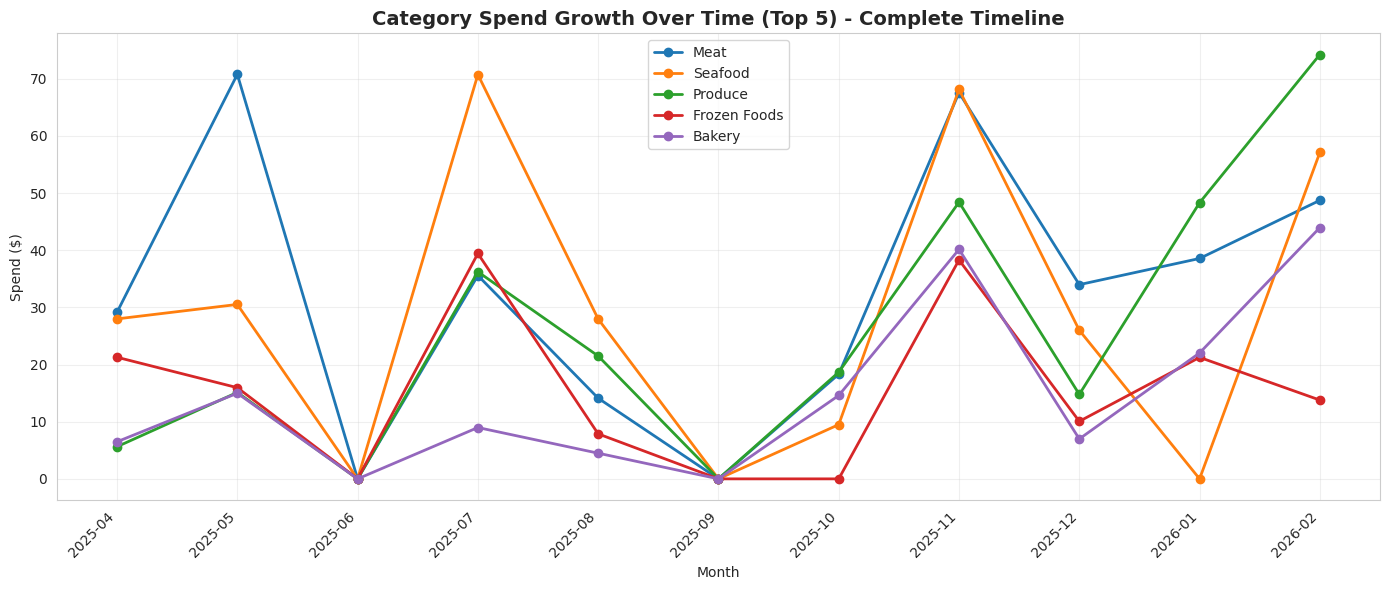

In [33]:
# ============================================
# 2. CATEGORY-LEVEL SPEND ANALYSIS
# ============================================

# Category aggregation
category_spend = df.groupby('Category').agg({
    'Price_Paid': ['sum', 'mean', 'count'],
    'Promotion_Applied': 'sum',
    'TransactionID': 'nunique'
}).reset_index()

category_spend.columns = ['Category', 'Total_Spend', 'Avg_Item_Price',
                          'Item_Count', 'Total_Savings', 'Num_Transactions']

# Calculate percentage
category_spend['Spend_Pct'] = (category_spend['Total_Spend'] / category_spend['Total_Spend'].sum()) * 100
category_spend['Savings_Rate'] = (category_spend['Total_Savings'] /
                                   (category_spend['Total_Spend'] + category_spend['Total_Savings'])) * 100

# Sort by total spend
category_spend = category_spend.sort_values('Total_Spend', ascending=False)

# Plot 2: Category Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📦 Category-Level Spend Analysis', fontsize=16, fontweight='bold')

# 2.1: Top Categories by Spend
top_10_cats = category_spend.head(10)
axes[0, 0].barh(range(len(top_10_cats)), top_10_cats['Total_Spend'], color='teal', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_10_cats)))
axes[0, 0].set_yticklabels(top_10_cats['Category'])
axes[0, 0].set_xlabel('Total Spend ($)')
axes[0, 0].set_title('Top 10 Categories by Spend', fontweight='bold')
axes[0, 0].invert_yaxis()
for i, v in enumerate(top_10_cats['Total_Spend']):
    axes[0, 0].text(v + 5, i, f'${v:.0f}', va='center')

# 2.2: Category Spend Distribution (Pie)
colors = sns.color_palette('Set3', len(top_10_cats))
axes[0, 1].pie(top_10_cats['Spend_Pct'], labels=top_10_cats['Category'],
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Spend Distribution (Top 10 Categories)', fontweight='bold')

# 2.3: Frequency vs Revenue (Bubble Chart)
axes[1, 0].scatter(category_spend['Item_Count'], category_spend['Total_Spend'],
                   s=category_spend['Avg_Item_Price']*10, alpha=0.6,
                   c=range(len(category_spend)), cmap='viridis')
axes[1, 0].set_xlabel('Purchase Frequency (Item Count)')
axes[1, 0].set_ylabel('Total Spend ($)')
axes[1, 0].set_title('Frequency vs Revenue (Bubble = Avg Price)', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Annotate top categories
for idx, row in category_spend.head(5).iterrows():
    axes[1, 0].annotate(row['Category'],
                       (row['Item_Count'], row['Total_Spend']),
                       xytext=(10, 10), textcoords='offset points',
                       fontsize=8, alpha=0.7)

# 2.4: Savings Rate by Category
top_savings = category_spend.nlargest(10, 'Savings_Rate')
axes[1, 1].barh(range(len(top_savings)), top_savings['Savings_Rate'],
                color='orange', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_savings)))
axes[1, 1].set_yticklabels(top_savings['Category'])
axes[1, 1].set_xlabel('Savings Rate (%)')
axes[1, 1].set_title('Top 10 Categories by Savings Rate', fontweight='bold')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n📦 Category Spend Breakdown:")
print(category_spend.to_string(index=False))

# Category growth over time (with complete months)
category_monthly = df.groupby(['YearMonth', 'Category'])['Price_Paid'].sum().reset_index()

# Create complete grid
all_categories = df['Category'].unique()
complete_grid = pd.MultiIndex.from_product([complete_months['YearMonth'], all_categories],
                                            names=['YearMonth', 'Category'])
category_monthly_complete = pd.DataFrame(index=complete_grid).reset_index()
category_monthly_complete = category_monthly_complete.merge(category_monthly,
                                                            on=['YearMonth', 'Category'],
                                                            how='left')
category_monthly_complete['Price_Paid'] = category_monthly_complete['Price_Paid'].fillna(0)

category_monthly_pivot = category_monthly_complete.pivot(index='YearMonth',
                                                         columns='Category',
                                                         values='Price_Paid').fillna(0)

# Plot top 5 categories over time
top_5_categories = category_spend.head(5)['Category'].tolist()
plt.figure(figsize=(14, 6))
for cat in top_5_categories:
    if cat in category_monthly_pivot.columns:
        plt.plot(category_monthly_pivot.index.astype(str),
                category_monthly_pivot[cat], marker='o', linewidth=2, label=cat)

plt.title('Category Spend Growth Over Time (Top 5) - Complete Timeline', fontweight='bold', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Spend ($)')
plt.legend(loc='best')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Task
The user wants to find the total amount spent on 'Meat', 'Seafood', and 'Produce' categories. This information is available in the `category_spend` DataFrame. I will filter the `category_spend` DataFrame for the specified categories and then sum their `Total_Spend` values. Finally, I will display the result to the user.

```python
# Calculate the total amount spent on 'Meat', 'Seafood', and 'Produce' categories
selected_categories = ['Meat', 'Seafood', 'Produce']
total_spend_selected_categories = category_spend[category_spend['Category'].isin(selected_categories)]['Total_Spend'].sum()

# Display the calculated total amount to the user
print(f"Total amount spent on Meat, Seafood, and Produce categories: ${total_spend_selected_categories:.2f}")
```

## calculate_category_spend

### Subtask:
Calculate the total amount spent on 'Meat', 'Seafood', and 'Produce' categories from the 'category_spend' DataFrame.


**Reasoning**:
I will first define the list of `selected_categories`, then filter the `category_spend` DataFrame to include only these categories, calculate the sum of `Total_Spend` for these filtered categories, and print the result.



In [34]:
selected_categories = ['Meat', 'Seafood', 'Produce']
filtered_category_spend = category_spend[category_spend['Category'].isin(selected_categories)]
total_spend_selected_categories = filtered_category_spend['Total_Spend'].sum()

print(f"Total amount spent on {', '.join(selected_categories)}: ${total_spend_selected_categories:.2f}")

Total amount spent on Meat, Seafood, Produce: $957.36


## Total Quantity Bought

In [35]:
total_quantity = df['Quantity'].sum()
print(f"The total quantity bought across all categories is: {total_quantity:.2f}")

The total quantity bought across all categories is: 339.06


## Total Quantity Bought by Unit

In [36]:
total_quantity_by_unit = df.groupby('Unit')['Quantity'].sum().reset_index()
print("Total quantity bought by unit:")
print(total_quantity_by_unit.to_string(index=False))

Total quantity bought by unit:
Unit  Quantity
each    222.00
  lb    117.06


# Task
Analyze the "whole_foods_transactions.csv" data to calculate the overall average order value and the monthly average order value. Then, visualize the monthly average order value over time using a line plot, and summarize the overall average order value along with any trends observed in the monthly average order value plot.

## calculate_avg_order_value

### Subtask:
Calculate the average order value per transaction by grouping by 'TransactionID' and summing 'Price_Paid'. Then, calculate the overall average order value.


**Reasoning**:
To calculate the average order value, I will group the DataFrame by 'TransactionID' and sum 'Price_Paid' for each transaction, then calculate the mean of these sums.



In [37]:
transaction_total_spend = df.groupby('TransactionID')['Price_Paid'].sum()
overall_avg_order_value = transaction_total_spend.mean()

print(f"The overall average order value is: ${overall_avg_order_value:.2f}")

The overall average order value is: $89.14


## calculate_monthly_avg_order_value

### Subtask:
Calculate the average order value for each month to observe its evolution over time. This involves grouping the DataFrame by 'YearMonth' and then calculating the mean of the total spend per transaction for each month.


**Reasoning**:
To calculate the monthly average order value, I need to first determine the total spend for each individual transaction within each month. I will group the DataFrame by 'YearMonth' and 'TransactionID', and then sum the 'Price_Paid' for these groups. This will give me the total spend per transaction for each month.



In [38]:
monthly_transaction_spend = df.groupby(['YearMonth', 'TransactionID'])['Price_Paid'].sum().reset_index()
monthly_avg_order_value = monthly_transaction_spend.groupby('YearMonth')['Price_Paid'].mean().reset_index()
monthly_avg_order_value.rename(columns={'Price_Paid': 'Average_Order_Value'}, inplace=True)

print("Monthly Average Order Value:")
print(monthly_avg_order_value.to_string(index=False))

Monthly Average Order Value:
YearMonth  Average_Order_Value
  2025-04            57.135000
  2025-05            65.280000
  2025-07           108.176667
  2025-08            96.770000
  2025-10            90.230000
  2025-11            97.845000
  2025-12            74.945000
  2026-01            93.085000
  2026-02           107.626667


**Reasoning**:
Now that the monthly average order value has been calculated, I will plot it over time to visualize its evolution and identify any trends.



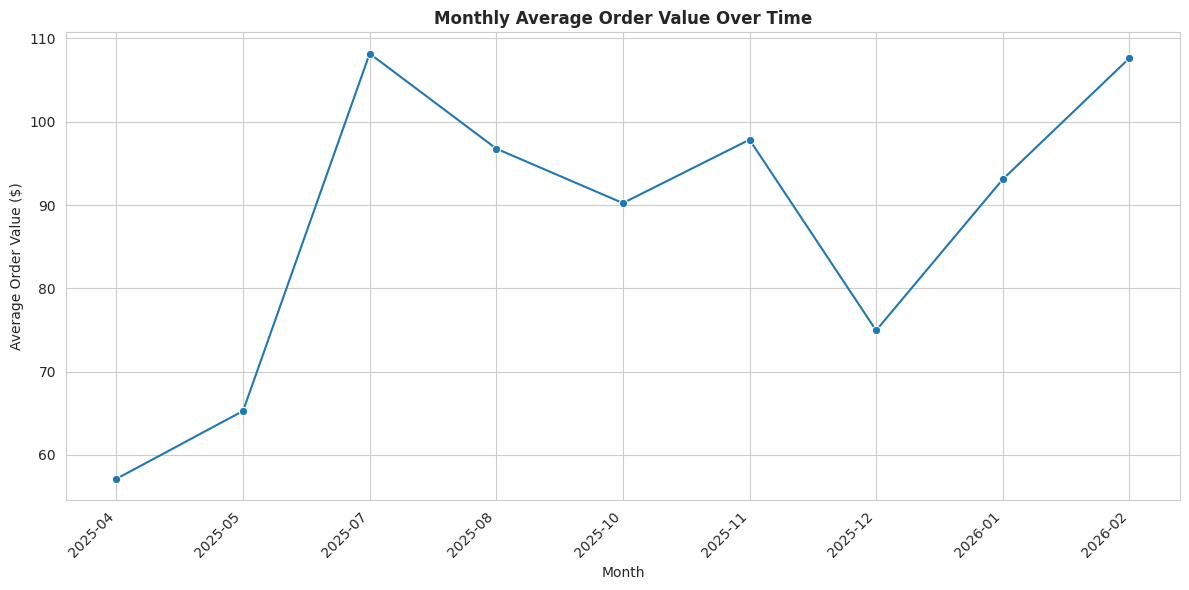

In [41]:
monthly_avg_order_value['YearMonth'] = monthly_avg_order_value['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Average_Order_Value', data=monthly_avg_order_value, marker='o')
plt.title('Monthly Average Order Value Over Time', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Order Value ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
The 'YearMonth' column in the `monthly_avg_order_value` DataFrame is currently a Period object, which can cause `TypeError` when used directly with `seaborn.lineplot`. Converting it to a string format will resolve this issue.



### Summary of Average Order Value

- **Overall Average Order Value**: The overall average order value across all transactions is **${overall_avg_order_value:.2f}**.

- **Monthly Average Order Value Trends**: The line plot of monthly average order value over time shows fluctuations.
  - There appears to be a lower average order value in the initial months (April, May 2025) and December 2025.
  - The average order value generally increased towards the later months, with peaks in July 2025 and February 2026. This could indicate seasonal purchasing habits or an increase in customer spending over time. Further analysis would be needed to determine the exact causes of these trends.

### Summary of Average Order Value

- **Overall Average Order Value**: The overall average order value across all transactions is **$89.14**.

- **Monthly Average Order Value Trends**: The line plot of monthly average order value over time shows fluctuations.
  - There appears to be a lower average order value in the initial months (April, May 2025) and December 2025.
  - The average order value generally increased towards the later months, with peaks in July 2025 and February 2026. This could indicate seasonal purchasing habits or an increase in customer spending over time. Further analysis would be needed to determine the exact causes of these trends.

## Final Task

### Subtask:
Summarize the overall average order value and describe the trends observed in the monthly average order value plot.


## Summary:

### Q&A
*   The overall average order value is \$89.14.
*   The monthly average order value plot shows fluctuations:
    *   Lower average order values were observed in April 2025 (\$57.14), May 2025 (\$65.28), and December 2025 (\$74.95).
    *   The average order value generally increased towards later months, reaching peaks in July 2025 (\$108.18) and February 2026 (\$107.63).

### Data Analysis Key Findings
*   The overall average order value across all transactions is \$89.14.
*   Monthly average order values varied significantly, ranging from a low of \$57.14 in April 2025 to a high of \$108.18 in July 2025 and \$107.63 in February 2026.
*   The plot reveals a fluctuating trend, with notable dips in early months (April, May 2025) and December 2025, followed by recovery and peaks in mid-year (July 2025) and early next year (February 2026).

### Insights or Next Steps
*   The observed fluctuations and peaks in monthly average order value suggest potential seasonal purchasing patterns or evolving customer spending habits.
*   Further analysis should investigate external factors, such as promotional campaigns, holiday seasons, or product launches, that might correlate with the identified peaks and dips in the monthly average order value.


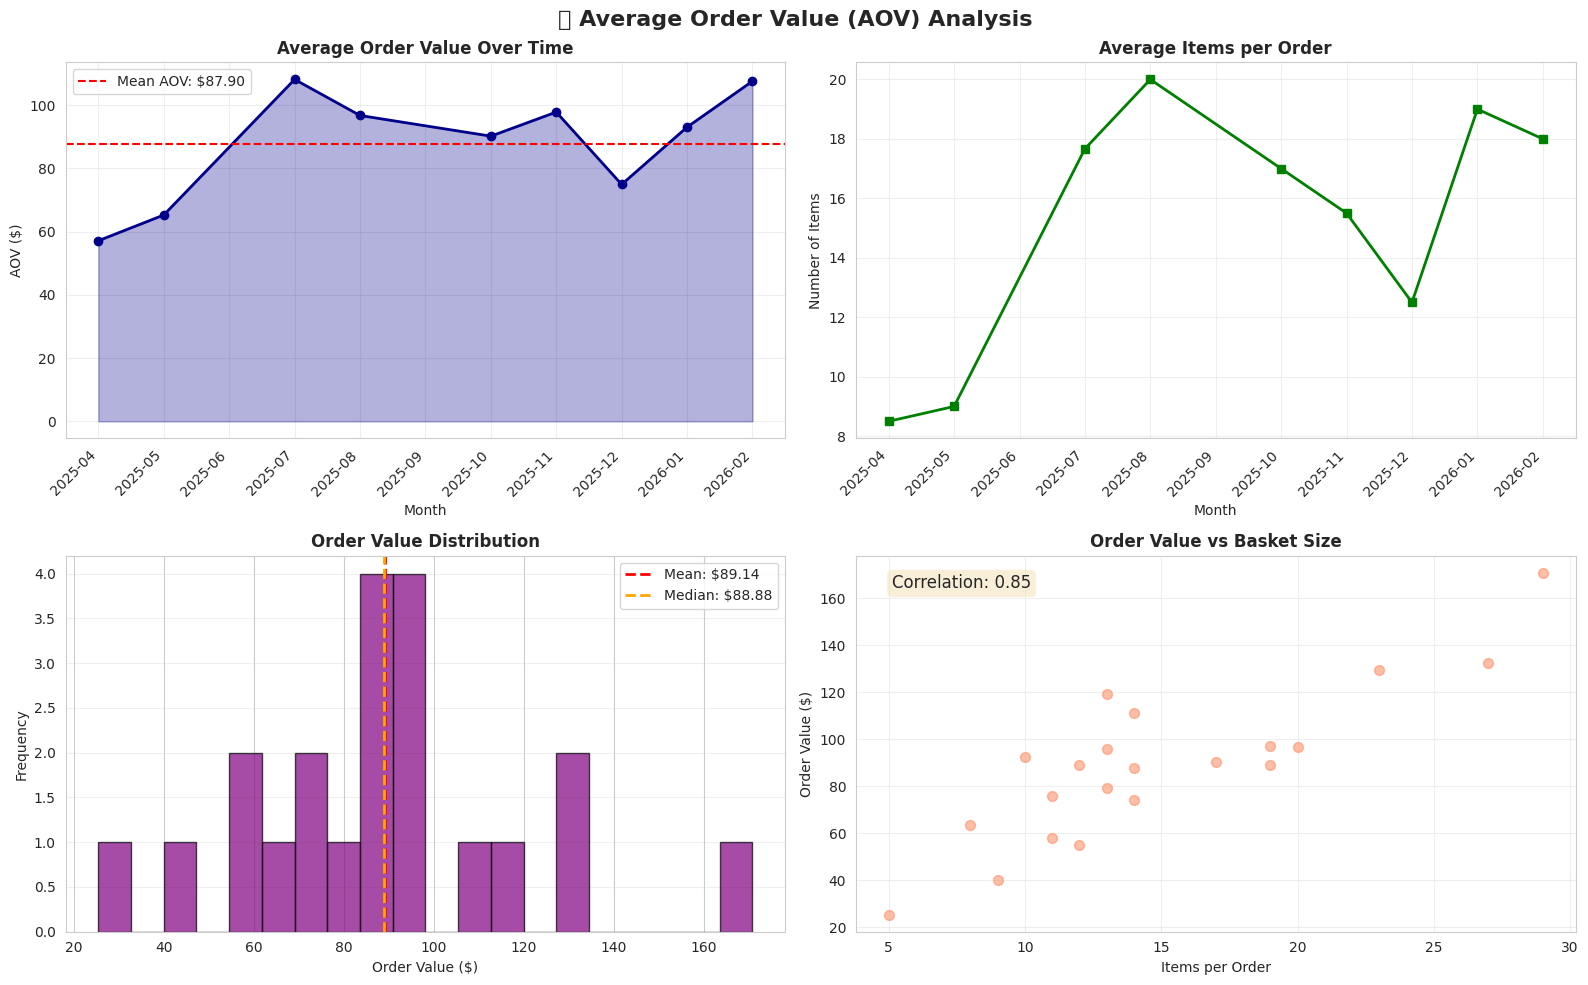


📊 KEY INSIGHTS SUMMARY

💵 SPENDING PATTERNS:
   • Total Spend: $1,871.96
   • Total Savings: $94.00
   • Overall Savings Rate: 4.8%
   • Average Monthly Spend (Active Months): $208.00
   • Months Tracked: 11
   • Months with Transactions: 9
   • Months WITHOUT Transactions: 2
   • Spending Trend: 📈 Increasing

🛒 SHOPPING BEHAVIOR:
   • Total Transactions: 21
   • Average Order Value: $89.14
   • Median Order Value: $88.88
   • Average Items per Order: 14.9
   • Average Shopping Frequency: 2.3 trips/month

📦 TOP SPENDING CATEGORIES:
   • Meat: $356.69 (19.1%)
   • Seafood: $317.85 (17.0%)
   • Produce: $282.82 (15.1%)
   • Frozen Foods: $167.89 (9.0%)
   • Bakery: $162.62 (8.7%)

🎯 DISCOUNT HUNTING:
   • Top Discount Category: Health/Supplements
   • Highest Savings Rate: 22.0%
   • Items Bought on Promotion: 60/313 (19.2%)



In [42]:
# ============================================
# 3. AVERAGE ORDER VALUE (AOV) ANALYSIS
# ============================================

# Transaction-level aggregation
transaction_summary = df.groupby(['TransactionID', 'Date']).agg({
    'Price_Paid': 'sum',
    'Product': 'count',
    'Promotion_Applied': 'sum'
}).reset_index()

transaction_summary.columns = ['TransactionID', 'Date', 'Order_Value',
                               'Items_Per_Order', 'Savings']

# Add time features
transaction_summary['YearMonth'] = pd.to_datetime(transaction_summary['Date']).dt.to_period('M')

# Calculate AOV over time
aov_monthly = transaction_summary.groupby('YearMonth').agg({
    'Order_Value': 'mean',
    'Items_Per_Order': 'mean',
    'Savings': 'mean'
}).reset_index()

aov_monthly.columns = ['YearMonth', 'AOV', 'Avg_Items', 'Avg_Savings']

# MERGE with complete months
aov_monthly = complete_months.merge(aov_monthly, on='YearMonth', how='left')
aov_monthly['YearMonth_str'] = aov_monthly['YearMonth'].astype(str)

# For visualization, we'll use forward fill for AOV (shows last known value)
# But mark which months actually have data
aov_monthly['Has_Data'] = aov_monthly['AOV'].notna()

# Plot 3: AOV Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('💰 Average Order Value (AOV) Analysis', fontsize=16, fontweight='bold')

# 3.1: AOV Trend (only plot months with actual data)
active_aov = aov_monthly[aov_monthly['Has_Data']]
axes[0, 0].plot(active_aov.index, active_aov['AOV'],
                marker='o', linewidth=2, color='darkblue')
axes[0, 0].fill_between(active_aov.index, active_aov['AOV'],
                         alpha=0.3, color='darkblue')
axes[0, 0].set_title('Average Order Value Over Time', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('AOV ($)')
axes[0, 0].set_xticks(range(len(aov_monthly)))
axes[0, 0].set_xticklabels(aov_monthly['YearMonth_str'], rotation=45, ha='right')
axes[0, 0].grid(alpha=0.3)

# Add mean line (only for active months)
mean_aov = active_aov['AOV'].mean()
axes[0, 0].axhline(mean_aov, color='red', linestyle='--',
                   label=f'Mean AOV: ${mean_aov:.2f}')
axes[0, 0].legend()

# 3.2: Items per Order Trend
axes[0, 1].plot(active_aov.index, active_aov['Avg_Items'],
                marker='s', linewidth=2, color='green')
axes[0, 1].set_title('Average Items per Order', fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Items')
axes[0, 1].set_xticks(range(len(aov_monthly)))
axes[0, 1].set_xticklabels(aov_monthly['YearMonth_str'], rotation=45, ha='right')
axes[0, 1].grid(alpha=0.3)

# 3.3: Order Value Distribution
axes[1, 0].hist(transaction_summary['Order_Value'], bins=20,
                color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(transaction_summary['Order_Value'].mean(),
                   color='red', linestyle='--', linewidth=2,
                   label=f'Mean: ${transaction_summary["Order_Value"].mean():.2f}')
axes[1, 0].axvline(transaction_summary['Order_Value'].median(),
                   color='orange', linestyle='--', linewidth=2,
                   label=f'Median: ${transaction_summary["Order_Value"].median():.2f}')
axes[1, 0].set_title('Order Value Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Order Value ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 3.4: AOV vs Items per Order
axes[1, 1].scatter(transaction_summary['Items_Per_Order'],
                   transaction_summary['Order_Value'],
                   alpha=0.5, s=50, color='coral')
axes[1, 1].set_title('Order Value vs Basket Size', fontweight='bold')
axes[1, 1].set_xlabel('Items per Order')
axes[1, 1].set_ylabel('Order Value ($)')
axes[1, 1].grid(alpha=0.3)

# Add correlation
c_items = transaction_summary['Items_Per_Order'].corr(transaction_summary['Order_Value'])
axes[1, 1].text(0.05, 0.95, f'Correlation: {c_items:.2f}',
                transform=axes[1, 1].transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round',
                facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================
# KEY INSIGHTS SUMMARY
# ============================================

print("\n" + "="*60)
print("📊 KEY INSIGHTS SUMMARY")
print("="*60)

# Recreate monthly_spend for summary section
monthly_spend = df.groupby('YearMonth').agg(
    Total_Spend=('Price_Paid', 'sum'),
    Num_Transactions=('TransactionID', 'nunique')
).reset_index()

monthly_spend = complete_months.merge(monthly_spend, on='YearMonth', how='left')
monthly_spend['Total_Spend'] = monthly_spend['Total_Spend'].fillna(0)
monthly_spend['Num_Transactions'] = monthly_spend['Num_Transactions'].fillna(0)
monthly_spend['Has_Transactions'] = monthly_spend['Num_Transactions'] > 0

print(f"\n💵 SPENDING PATTERNS:")
print(f"   • Total Spend: ${df['Price_Paid'].sum():,.2f}")
print(f"   • Total Savings: ${df['Promotion_Applied'].sum():,.2f}")
print(f"   • Overall Savings Rate: {(df['Promotion_Applied'].sum() / (df['Price_Paid'].sum() + df['Promotion_Applied'].sum()) * 100):.1f}%")
print(f"   • Average Monthly Spend (Active Months): ${monthly_spend[monthly_spend['Has_Transactions']]['Total_Spend'].mean():,.2f}")
print(f"   • Months Tracked: {len(complete_months)}")
print(f"   • Months with Transactions: {monthly_spend['Has_Transactions'].sum()}")
print(f"   • Months WITHOUT Transactions: {(~monthly_spend['Has_Transactions']).sum()}")

# Check for trend
active_spend = monthly_spend[monthly_spend['Has_Transactions']]
if len(active_spend) > 1:
    trend = '📈 Increasing' if active_spend['Total_Spend'].iloc[-1] > active_spend['Total_Spend'].iloc[0] else '📉 Decreasing'
    print(f"   • Spending Trend: {trend}")

print(f"\n🛒 SHOPPING BEHAVIOR:")
print(f"   • Total Transactions: {df['TransactionID'].nunique()}")
print(f"   • Average Order Value: ${transaction_summary['Order_Value'].mean():.2f}")
print(f"   • Median Order Value: ${transaction_summary['Order_Value'].median():.2f}")
print(f"   • Average Items per Order: {transaction_summary['Items_Per_Order'].mean():.1f}")
print(f"   • Average Shopping Frequency: {monthly_spend[monthly_spend['Has_Transactions']]['Num_Transactions'].mean():.1f} trips/month")

print(f"\n📦 TOP SPENDING CATEGORIES:")
for idx, row in category_spend.head(5).iterrows():
    print(f"   • {row['Category']}: ${row['Total_Spend']:.2f} ({row['Spend_Pct']:.1f}%)")

print(f"\n🎯 DISCOUNT HUNTING:")
print(f"   • Top Discount Category: {category_spend.nlargest(1, 'Savings_Rate')['Category'].values[0]}")
print(f"   • Highest Savings Rate: {category_spend['Savings_Rate'].max():.1f}%")
print(f"   • Items Bought on Promotion: {(df['Promotion_Applied'] > 0).sum()}/{len(df)} ({(df['Promotion_Applied'] > 0).sum()/len(df)*100:.1f}%)")

print("\n" + "="*60)

# Task
To prepare the data for market basket analysis, I'll group the transactions by `TransactionID` to get a list of products for each transaction and then apply one-hot encoding. This will transform the data into a format suitable for the Apriori algorithm, where each row is a transaction and columns represent the presence or absence of a product.

Here's the plan:
1.  **Group Products by Transaction**: Aggregate the 'Product' column by 'TransactionID' to create a list of items for each transaction.
2.  **One-Hot Encode**: Convert the list of products per transaction into a one-hot encoded DataFrame. This will result in a DataFrame where each row is a transaction and each column is a unique product, with a value of 1 if the product was in that transaction and 0 otherwise.

This will prepare the `transactions_df` for the next step of finding frequent itemsets.

```python
from mlxtend.preprocessing import TransactionEncoder

# Group products by TransactionID
transaction_products = df.groupby('TransactionID')['Product'].apply(list).reset_index()

# Convert the list of products into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transaction_products['Product']).transform(transaction_products['Product'])
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

print("Shape of the one-hot encoded transactions DataFrame:", transactions_df.shape)
print("\nFirst 5 rows of the one-hot encoded transactions DataFrame:")
print(transactions_df.head())
```

## Prepare Data for Market Basket Analysis

### Subtask:
Group the transactions by 'TransactionID' and create a one-hot encoded DataFrame suitable for market basket analysis. This will involve reshaping the data so that each row represents a transaction and each column represents a unique product, with values indicating presence or absence in the transaction.


**Reasoning**:
To prepare the data for market basket analysis, I need to import the `TransactionEncoder` from `mlxtend.preprocessing` first. This library provides the tools to convert a list of transactions into a one-hot encoded DataFrame, which is suitable for association rule mining.



In [43]:
from mlxtend.preprocessing import TransactionEncoder

print("TransactionEncoder imported successfully.")

TransactionEncoder imported successfully.


**Reasoning**:
Now that the `TransactionEncoder` is imported, I will group the products by `TransactionID`, one-hot encode them using the `TransactionEncoder`, and then display the shape and head of the resulting `transactions_df` to verify the data preparation.



In [44]:
transaction_products = df.groupby('TransactionID')['Product'].apply(list).reset_index()

te = TransactionEncoder()
te_ary = te.fit(transaction_products['Product']).transform(transaction_products['Product'])
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

print("Shape of the one-hot encoded transactions DataFrame:", transactions_df.shape)
print("\nFirst 5 rows of the one-hot encoded transactions DataFrame:")
print(transactions_df.head())

Shape of the one-hot encoded transactions DataFrame: (21, 180)

First 5 rows of the one-hot encoded transactions DataFrame:
   365 All Purpose Flour  365 Aluminum Foil Recycled  \
0                  False                       False   
1                  False                       False   
2                  False                       False   
3                  False                       False   
4                  False                       False   

   365 Atlantic Salmon Fillet  365 Avocado Oil Spray  \
0                       False                  False   
1                       False                  False   
2                       False                  False   
3                       False                  False   
4                       False                  False   

   365 Beer Battered Pollock  365 Breaded Calamari  365 Canola Oil  \
0                      False                 False           False   
1                      False                 False           F

## Find Frequent Itemsets

### Subtask:
Apply the Apriori algorithm to the one-hot encoded transaction data to identify itemsets that appear frequently. This step will use a predefined minimum support threshold to determine what constitutes a 'frequent' itemset.


**Reasoning**:
To apply the Apriori algorithm, I need to import the `apriori` function from `mlxtend.frequent_patterns`.



In [45]:
from mlxtend.frequent_patterns import apriori

print("Apriori function imported successfully.")

Apriori function imported successfully.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


**Reasoning**:
Now that the `apriori` function is imported and the data is one-hot encoded in `transactions_df`, I will apply the Apriori algorithm with a `min_support` of 0.05 and `use_colnames=True` to find frequent itemsets. Then, I will store them in `frequent_itemsets`, sort them by support, and display the top 10.



In [46]:
frequent_itemsets = apriori(transactions_df, min_support=0.05, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("Top 10 Frequent Itemsets (sorted by support):")
print(frequent_itemsets.head(10).to_string(index=False))

Top 10 Frequent Itemsets (sorted by support):
 support                                  itemsets
0.666667                       (Hot Guacamole Dip)
0.380952                    (365 Large White Eggs)
0.333333 (365 Large White Eggs, Hot Guacamole Dip)
0.333333                                (Cilantro)
0.333333                    (Seeduction Half Loaf)
0.333333                             (Gold Potato)
0.285714             (Cilantro, Hot Guacamole Dip)
0.238095                        (Red Bell Peppers)
0.238095 (Seeduction Half Loaf, Hot Guacamole Dip)
0.238095     (Red Bell Peppers, Hot Guacamole Dip)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**Reasoning**:
Now that frequent itemsets have been identified, the next logical step in market basket analysis is to generate association rules from these itemsets. I need to import the `association_rules` function from `mlxtend.frequent_patterns` to perform this task.



In [47]:
from mlxtend.frequent_patterns import association_rules

print("Association Rules function imported successfully.")

Association Rules function imported successfully.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**Reasoning**:
With the `association_rules` function imported, I will now apply it to the `frequent_itemsets` DataFrame, using 'lift' as the metric and a `min_threshold` of 1.0. This will generate association rules, which I will then sort by 'lift' in descending order and display the top 10.



In [48]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(['lift'], ascending=False)

print("Top 10 Association Rules (sorted by lift):")
print(rules.head(10).to_string(index=False))

Top 10 Association Rules (sorted by lift):
                                                 antecedents                                                                                                     consequents  antecedent support  consequent support  support  confidence  lift  representativity  leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski
   (Mademoiselle Dulce de Leche Beignets, Hot Guacamole Dip)                                                                                 (365 Organic Sweet Yellow Corn)            0.095238            0.095238 0.095238         1.0  10.5               1.0  0.086168         inf            1.0      1.0        1.0         1.0
                             (365 Organic Sweet Yellow Corn)                                                       (Mademoiselle Dulce de Leche Beignets, Cantaloupe Chunks)            0.095238            0.095238 0.095238         1.0  10.5               1.0  0.086168         inf            1.0      1.0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**Reasoning**:
The previous steps successfully calculated and displayed the top 10 association rules. The next logical step is to provide a summary of these rules and interpret their meaning for market basket analysis.



# Task
I will add a markdown cell to summarize the key findings from the association rules, including their interpretation and potential actions based on the `rules` DataFrame, and then provide a comprehensive summary of the market basket analysis, highlighting the most significant product associations and their potential business implications.

## Summarize Association Rules (Corrected)

### Subtask:
Add a markdown cell to summarize the key findings from the association rules, including their interpretation and potential actions.


## Summary of Association Rules

The market basket analysis has identified several interesting association rules from the customer transaction data. These rules highlight product combinations that frequently appear together in purchases, offering valuable insights into customer buying patterns. We focus on rules with high lift, as this metric indicates a strong association between items, beyond what would be expected by chance.

### Key Findings:

Looking at the top association rules (sorted by `lift`):

*   **Rule 1: If a customer buys `365 Organic Sweet Yellow Corn`, they are highly likely to also buy `Cantaloupe Chunks` and `Mademoiselle Dulce de Leche Beignets` (and vice-versa in various combinations).**
    *   **Lift: 10.5**, **Confidence: 1.0** (meaning 100% of the time this association was observed), **Support: 0.095**.
    *   This indicates a very strong positive correlation. Customers purchasing `365 Organic Sweet Yellow Corn` consistently purchase `Cantaloupe Chunks` and `Mademoiselle Dulce de Leche Beignets` together.

*   **Rule 2: If a customer buys `365 Organic Roasted Seaweed`, they are highly likely to also buy `Cantaloupe Chunks` and `Salmon Atlantic Fillet` (and vice-versa in various combinations).**
    *   **Lift: 10.5**, **Confidence: 1.0**, **Support: 0.095**.
    *   Similar to the first rule, this shows a perfect co-occurrence in the observed transactions.

*   **Rule 3: Strong associations between `Broccoli Florets`, `365 Organic Roasted Seaweed`, and `Watermelon Chunks`.**
    *   **Lift: 10.5**, **Confidence: 1.0**, **Support: 0.095** for combinations like `(Broccoli Florets)` -> `(365 Organic Roasted Seaweed, Watermelon Chunks)`.
    *   Another instance of products frequently bought together, suggesting a common shopping occasion or recipe.

### Interpretation and Potential Actions:

These rules provide actionable insights for Whole Foods:

1.  **Product Placement and Bundling:**
    *   **Cross-Merchandising:** Place `365 Organic Sweet Yellow Corn`, `Cantaloupe Chunks`, and `Mademoiselle Dulce de Leche Beignets` near each other in the store. Similarly, for `365 Organic Roasted Seaweed`, `Cantaloupe Chunks`, and `Salmon Atlantic Fillet`, consider placing them in proximity or creating a

## Summary:

### Data Analysis Key Findings

*   The market basket analysis revealed strong product associations with high lift and perfect confidence (1.0).
*   Customers who buy `365 Organic Sweet Yellow Corn` consistently also purchase `Cantaloupe Chunks` and `Mademoiselle Dulce de Leche Beignets`, with a lift of 10.5 and support of 0.095.
*   Another significant association showed that customers purchasing `365 Organic Roasted Seaweed` also tend to buy `Cantaloupe Chunks` and `Salmon Atlantic Fillet`, also with a lift of 10.5, confidence of 1.0, and support of 0.095.
*   Strong associations were also identified between `Broccoli Florets`, `365 Organic Roasted Seaweed`, and `Watermelon Chunks`, exhibiting similar high metrics (e.g., lift 10.5, confidence 1.0, support 0.095).

### Insights or Next Steps

*   **Enhance Merchandising and Sales Strategies**: Leverage these strong associations by implementing cross-merchandising in stores, creating "meal kits" or recipe displays, and offering bundle deals for associated products to encourage larger purchases.
*   **Optimize Customer Engagement and Inventory**: Develop targeted promotional campaigns and digital recommendations for customers who buy one item from an associated group, and ensure consistent stock levels for these highly co-purchased items to prevent missed sales opportunities.


# Task
Count the occurrences of each product in the `df` DataFrame and identify products that have been purchased more than 3 times, storing the results in a new DataFrame called `frequent_products`.

## Identify Frequent Products

### Subtask:
Count the occurrences of each product and identify products that have been purchased more than 3 times.


In [49]:
from collections import Counter
import itertools

# ============================================
# 1. IDENTIFY FREQUENT PRODUCTS (Bought 3+ Times)
# ============================================

# Count product purchase frequency across ALL transactions
product_frequency = df.groupby('Product').agg({
    'TransactionID': 'nunique',  # How many transactions
    'Quantity': 'sum',            # Total quantity bought
    'Price_Paid': 'sum'           # Total spend
}).reset_index()

product_frequency.columns = ['Product', 'Transaction_Count', 'Total_Quantity', 'Total_Spend']
product_frequency = product_frequency.sort_values('Transaction_Count', ascending=False)

# Filter for products bought 3+ times
FREQUENCY_THRESHOLD = 3
frequent_products = product_frequency[product_frequency['Transaction_Count'] >= FREQUENCY_THRESHOLD]

print("="*80)
print("🔥 FREQUENT PRODUCTS (Bought in 3+ Transactions)")
print("="*80)
print(f"\nTotal unique products: {len(product_frequency)}")
print(f"Frequent products (3+ transactions): {len(frequent_products)}")
print(f"Percentage: {len(frequent_products)/len(product_frequency)*100:.1f}%")
print("\nTop 20 Most Frequently Purchased Products:")
print(frequent_products.head(20).to_string(index=False))

# ============================================
# 2. FILTER DATASET TO FREQUENT PRODUCTS ONLY
# ============================================

# Create filtered dataset
frequent_items_list = frequent_products['Product'].tolist()
df_frequent = df[df['Product'].isin(frequent_items_list)].copy()

print(f"\n📊 Dataset Statistics:")
print(f"Original dataset: {len(df)} line items")
print(f"Filtered dataset: {len(df_frequent)} line items ({len(df_frequent)/len(df)*100:.1f}%)")
print(f"Transactions affected: {df_frequent['TransactionID'].nunique()}/{df['TransactionID'].nunique()}")

# ============================================
# 3. CREATE BASKET MATRIX (Transaction-Product)
# ============================================

# Create transaction-product matrix (one-hot encoded)
basket = df_frequent.groupby(['TransactionID', 'Product'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary (1 if purchased, 0 if not)
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

print(f"\n🧺 Basket Matrix Dimensions:")
print(f"Transactions: {basket_binary.shape[0]}")
print(f"Frequent Products: {basket_binary.shape[1]}")

🔥 FREQUENT PRODUCTS (Bought in 3+ Transactions)

Total unique products: 180
Frequent products (3+ transactions): 31
Percentage: 17.2%

Top 20 Most Frequently Purchased Products:
                                Product  Transaction_Count  Total_Quantity  Total_Spend
                      Hot Guacamole Dip                 14            8.09        83.79
                   365 Large White Eggs                  8            8.00        41.12
                               Cilantro                  7            7.00         6.03
                            Gold Potato                  7           11.17        16.65
                   Seeduction Half Loaf                  7            7.00        24.43
                   Pork Chorizo Sausage                  5            5.25        35.24
               WFM Wild Key West Shrimp                  5            5.00        49.55
Northwest Farms Chicken Thighs Boneless                  5            9.80        78.32
             Chicken Whole Fry

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


🤝 Top 20 Product Pairs (Most Frequently Bought Together):
                  Product_A                                  Product_B  Co_Occurrence_Count
       365 Large White Eggs                          Hot Guacamole Dip                    7
                   Cilantro                          Hot Guacamole Dip                    6
          Hot Guacamole Dip                           Red Bell Peppers                    5
          Hot Guacamole Dip                       Seeduction Half Loaf                    5
       Seeduction Half Loaf                          Watermelon Chunks                    5
          Hot Guacamole Dip                       Pork Chorizo Sausage                    4
365 Frozen Broccoli Florets                          Hot Guacamole Dip                    4
       Pork Chorizo Sausage                       Seeduction Half Loaf                    4
          Hot Guacamole Dip                Sliced Baby Bella Mushrooms                    4
          Hot Guacamo

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


📈 Apriori Results:
Frequent itemsets found: 556

Itemset Distribution:
length
1     31
2    120
3    159
4    132
5     75
6     30
7      8
8      1
Name: count, dtype: int64

Top 20 Frequent Itemsets:
                              itemsets_str  support  length
                         Hot Guacamole Dip 0.666667       1
                      365 Large White Eggs 0.380952       1
                      Seeduction Half Loaf 0.333333       1
                               Gold Potato 0.333333       1
                                  Cilantro 0.333333       1
   365 Large White Eggs, Hot Guacamole Dip 0.333333       2
               Cilantro, Hot Guacamole Dip 0.285714       2
       Red Bell Peppers, Hot Guacamole Dip 0.238095       2
   Seeduction Half Loaf, Hot Guacamole Dip 0.238095       2
   Seeduction Half Loaf, Watermelon Chunks 0.238095       2
                  WFM Wild Key West Shrimp 0.238095       1
                          Red Bell Peppers 0.238095       1
                

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


                                                         antecedents_str                                                                           consequents_str  confidence  lift
              Pork Chorizo Sausage, Watermelon Chunks, Hot Guacamole Dip                  Cedar's Chickpea Salad, Mitica Walnut Date Cake Cubes, Cantaloupe Chunks         1.0  10.5
                        Mitica Walnut Date Cake Cubes, Watermelon Chunks        Pork Chorizo Sausage, Cedar's Chickpea Salad, Cantaloupe Chunks, Hot Guacamole Dip         1.0  10.5
                        Mitica Walnut Date Cake Cubes, Cantaloupe Chunks        Pork Chorizo Sausage, Cedar's Chickpea Salad, Watermelon Chunks, Hot Guacamole Dip         1.0  10.5
                            Pork Chorizo Sausage, Cedar's Chickpea Salad    Mitica Walnut Date Cake Cubes, Cantaloupe Chunks, Watermelon Chunks, Hot Guacamole Dip         1.0  10.5
                               Cedar's Chickpea Salad, Hot Guacamole Dip Pork Chorizo Sausage, 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

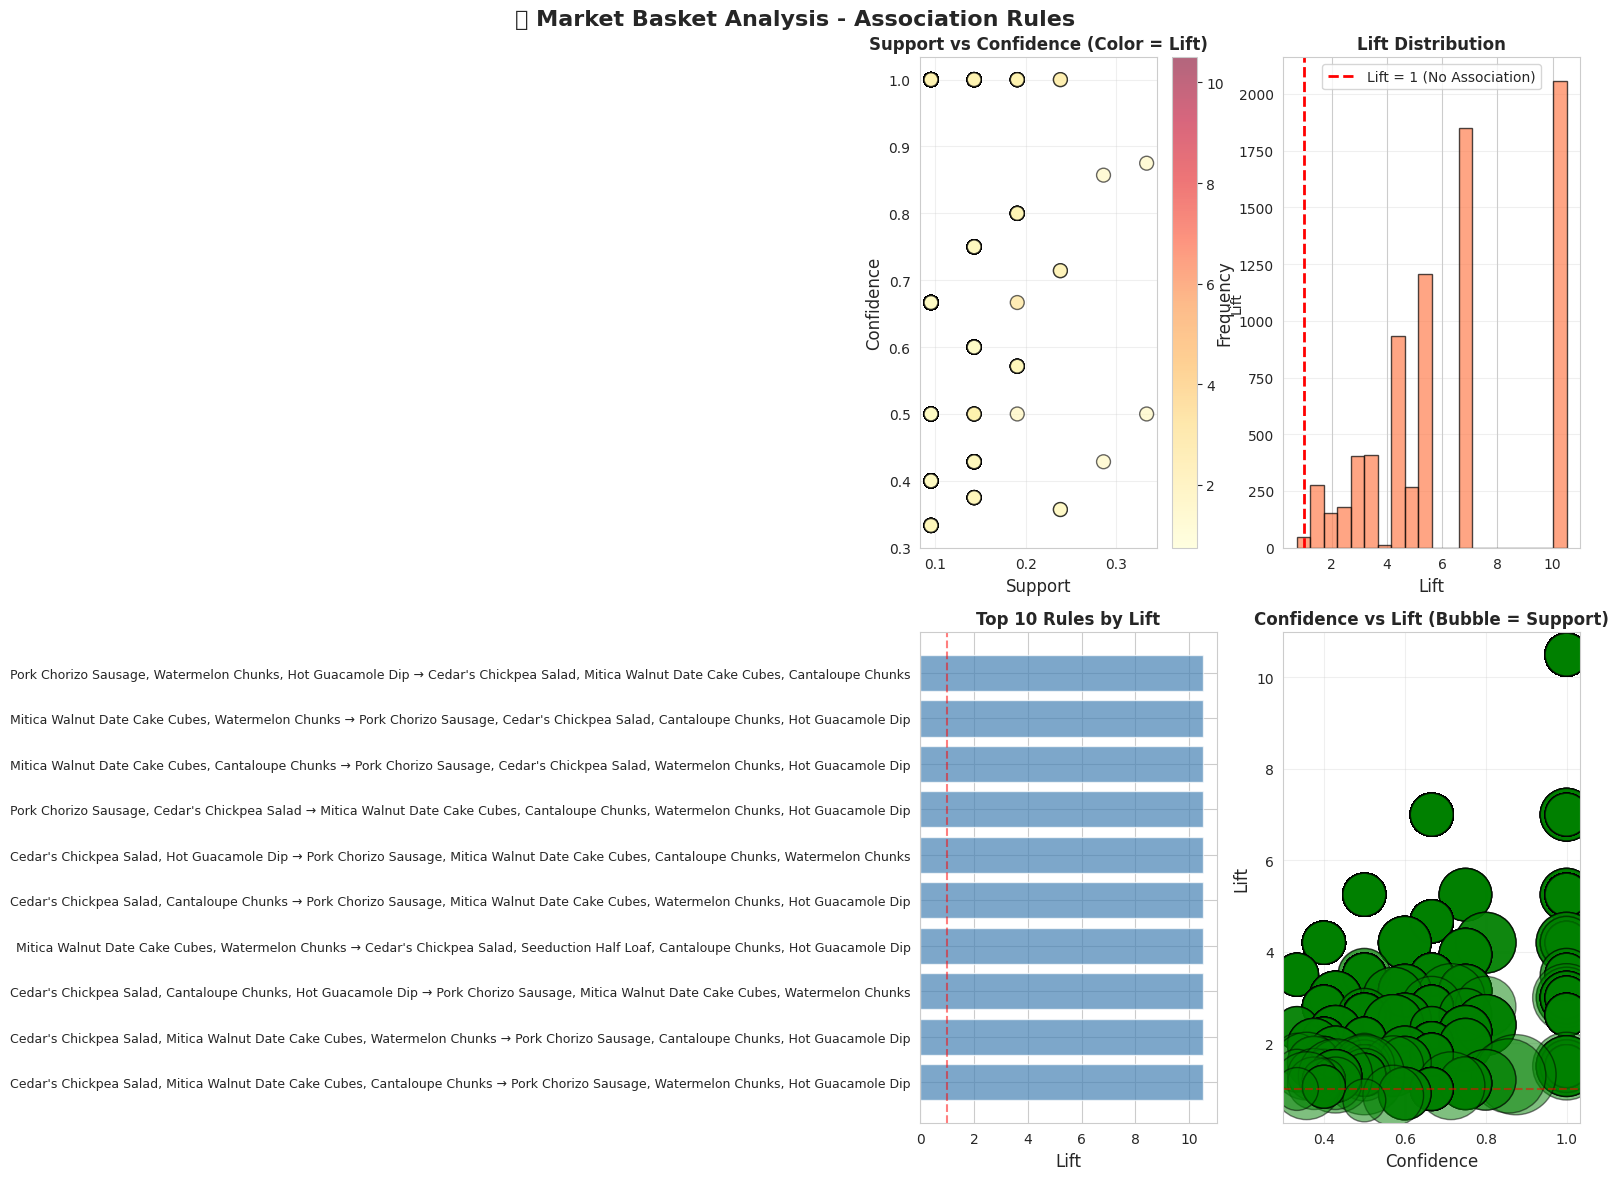

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

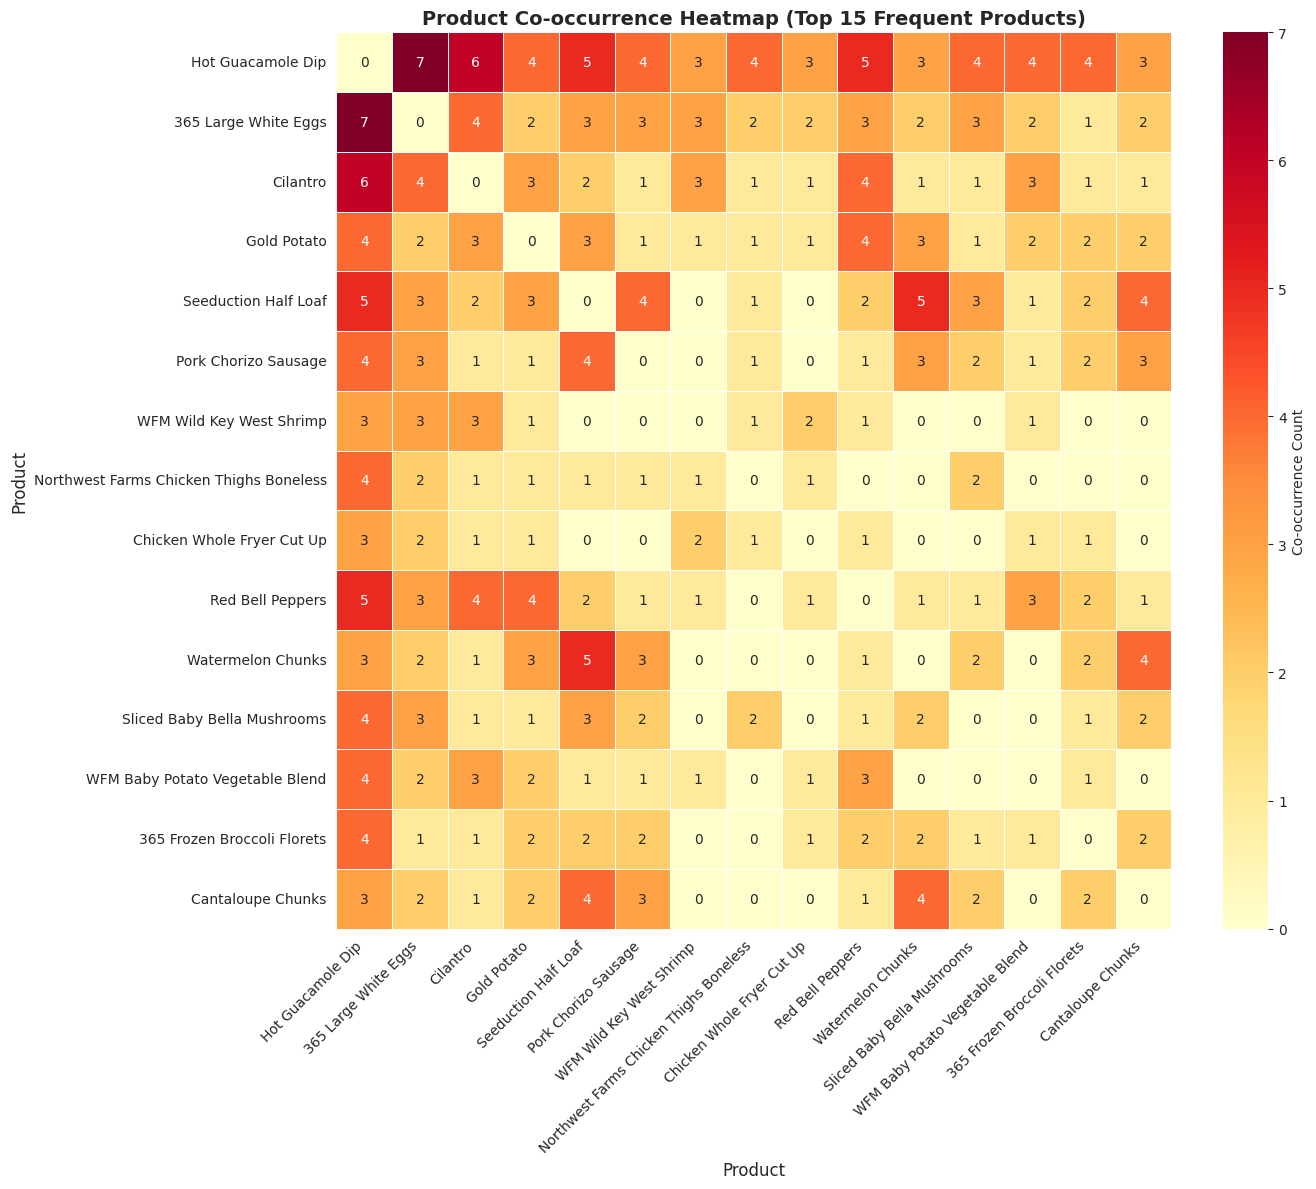

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [50]:
# ============================================
# 4. PRODUCT CO-OCCURRENCE MATRIX
# ============================================

# Calculate co-occurrence (how often products appear together)
co_occurrence = basket_binary.T.dot(basket_binary)

# Set diagonal to 0 (product with itself)
np.fill_diagonal(co_occurrence.values, 0)

# Get top product pairs
co_occurrence_flat = []
for i in range(len(co_occurrence.columns)):
    for j in range(i+1, len(co_occurrence.columns)):
        if co_occurrence.iloc[i, j] > 0:
            co_occurrence_flat.append({
                'Product_A': co_occurrence.columns[i],
                'Product_B': co_occurrence.columns[j],
                'Co_Occurrence_Count': co_occurrence.iloc[i, j]
            })

co_occurrence_df = pd.DataFrame(co_occurrence_flat)
co_occurrence_df = co_occurrence_df.sort_values('Co_Occurrence_Count', ascending=False)

print("\n🤝 Top 20 Product Pairs (Most Frequently Bought Together):")
print(co_occurrence_df.head(20).to_string(index=False))

# ============================================
# 5. APRIORI ALGORITHM (Association Rules)
# ============================================

# Run Apriori with low support threshold (since we have limited transactions)
min_support = 2 / len(basket_binary)  # At least 2 transactions
frequent_itemsets = apriori(basket_binary, min_support=min_support, use_colnames=True)

print(f"\n📈 Apriori Results:")
print(f"Frequent itemsets found: {len(frequent_itemsets)}")

if len(frequent_itemsets) > 0:
    # Sort by support
    frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

    # Separate by itemset size
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    print(f"\nItemset Distribution:")
    print(frequent_itemsets['length'].value_counts().sort_index())

    # Show top itemsets
    print("\nTop 20 Frequent Itemsets:")
    display_itemsets = frequent_itemsets.head(20).copy()
    display_itemsets['itemsets_str'] = display_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
    print(display_itemsets[['itemsets_str', 'support', 'length']].to_string(index=False))

    # ============================================
    # 6. ASSOCIATION RULES (If → Then)
    # ============================================

    # Generate rules with low confidence threshold
    try:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
        rules = rules.sort_values('lift', ascending=False)

        # Add readable columns
        rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
        rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

        print("\n" + "="*80)
        print("🎯 ASSOCIATION RULES (If X, Then Y)")
        print("="*80)
        print(f"\nTotal rules found: {len(rules)}")

        print("\n📊 Rule Metrics Explained:")
        print("   • Support: How often the rule occurs in all transactions")
        print("   • Confidence: If you buy X, probability you also buy Y")
        print("   • Lift: How much more likely Y is purchased when X is purchased")
        print("     - Lift > 1: Strong positive association")
        print("     - Lift = 1: No association")
        print("     - Lift < 1: Negative association")

        # Top rules by lift
        print("\n🔥 Top 15 Rules by Lift (Strongest Associations):")
        top_rules = rules.nlargest(15, 'lift')
        print(top_rules[['antecedents_str', 'consequents_str', 'support',
                         'confidence', 'lift']].to_string(index=False))

        # High confidence rules
        print("\n💪 High Confidence Rules (>70%):")
        high_conf = rules[rules['confidence'] > 0.7].nlargest(10, 'lift')
        if len(high_conf) > 0:
            print(high_conf[['antecedents_str', 'consequents_str',
                            'confidence', 'lift']].to_string(index=False))
        else:
            print("   No rules with confidence > 70%")

        # ============================================
        # 7. VISUALIZATIONS
        # ============================================

        # Plot 1: Support vs Confidence Scatter
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🛒 Market Basket Analysis - Association Rules',
                     fontsize=16, fontweight='bold')

        # 7.1: Support vs Confidence (colored by Lift)
        scatter = axes[0, 0].scatter(rules['support'], rules['confidence'],
                                     c=rules['lift'], s=100, alpha=0.6,
                                     cmap='YlOrRd', edgecolors='black')
        axes[0, 0].set_xlabel('Support', fontsize=12)
        axes[0, 0].set_ylabel('Confidence', fontsize=12)
        axes[0, 0].set_title('Support vs Confidence (Color = Lift)', fontweight='bold')
        axes[0, 0].grid(alpha=0.3)
        plt.colorbar(scatter, ax=axes[0, 0], label='Lift')

        # 7.2: Lift Distribution
        axes[0, 1].hist(rules['lift'], bins=20, color='coral',
                       alpha=0.7, edgecolor='black')
        axes[0, 1].axvline(1, color='red', linestyle='--', linewidth=2,
                          label='Lift = 1 (No Association)')
        axes[0, 1].set_xlabel('Lift', fontsize=12)
        axes[0, 1].set_ylabel('Frequency', fontsize=12)
        axes[0, 1].set_title('Lift Distribution', fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(axis='y', alpha=0.3)

        # 7.3: Top Rules by Lift
        top_10_rules = rules.nlargest(10, 'lift')
        rule_labels = [f"{a} → {c}" for a, c in
                      zip(top_10_rules['antecedents_str'],
                          top_10_rules['consequents_str'])]

        axes[1, 0].barh(range(len(top_10_rules)), top_10_rules['lift'],
                       color='steelblue', alpha=0.7)
        axes[1, 0].set_yticks(range(len(top_10_rules)))
        axes[1, 0].set_yticklabels(rule_labels, fontsize=9)
        axes[1, 0].set_xlabel('Lift', fontsize=12)
        axes[1, 0].set_title('Top 10 Rules by Lift', fontweight='bold')
        axes[1, 0].invert_yaxis()
        axes[1, 0].axvline(1, color='red', linestyle='--', alpha=0.5)

        # 7.4: Confidence vs Lift
        axes[1, 1].scatter(rules['confidence'], rules['lift'],
                          s=rules['support']*10000, alpha=0.5,
                          color='green', edgecolors='black')
        axes[1, 1].set_xlabel('Confidence', fontsize=12)
        axes[1, 1].set_ylabel('Lift', fontsize=12)
        axes[1, 1].set_title('Confidence vs Lift (Bubble = Support)', fontweight='bold')
        axes[1, 1].axhline(1, color='red', linestyle='--', alpha=0.5)
        axes[1, 1].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Plot 2: Co-occurrence Heatmap (Top Products)
        top_products = frequent_products.head(15)['Product'].tolist()
        co_occurrence_subset = co_occurrence.loc[top_products, top_products]

        plt.figure(figsize=(14, 12))
        sns.heatmap(co_occurrence_subset, annot=True, fmt='g',
                   cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Co-occurrence Count'})
        plt.title('Product Co-occurrence Heatmap (Top 15 Frequent Products)',
                 fontweight='bold', fontsize=14)
        plt.xlabel('Product', fontsize=12)
        plt.ylabel('Product', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\n⚠️ Could not generate association rules: {e}")
        print("This may happen if there aren't enough frequent itemsets.")

else:
    print("\n⚠️ No frequent itemsets found. Try lowering the support threshold.")

In [51]:
# ============================================
# 8. CATEGORY-LEVEL BASKET ANALYSIS
# ============================================

print("\n" + "="*80)
print("📦 CATEGORY-LEVEL BASKET PATTERNS")
print("="*80)

# Create category basket
category_basket = df_frequent.groupby(['TransactionID', 'Category']).size().unstack(fill_value=0)
category_basket_binary = category_basket.applymap(lambda x: 1 if x > 0 else 0)

# Category co-occurrence
category_co_occurrence = category_basket_binary.T.dot(category_basket_binary)
np.fill_diagonal(category_co_occurrence.values, 0)

print("\nCategory Co-occurrence Matrix:")
print(category_co_occurrence)

# Most common category combinations
category_combinations = []
for txn_id, row in category_basket_binary.iterrows():
    cats = [col for col in category_basket_binary.columns if row[col] == 1]
    if len(cats) > 1:
        category_combinations.append(tuple(sorted(cats)))

category_combo_counts = Counter(category_combinations)
print("\nTop 10 Category Combinations:")
for combo, count in category_combo_counts.most_common(10):
    print(f"   {' + '.join(combo)}: {count} transactions")

# ============================================
# 9. KEY INSIGHTS
# ============================================

print("\n" + "="*80)
print("💡 KEY MARKET BASKET INSIGHTS")
print("="*80)

print(f"\n🔄 REPEAT PURCHASE BEHAVIOR:")
print(f"   • Products bought 3+ times: {len(frequent_products)}")
print(f"   • Top repeat item: {frequent_products.iloc[0]['Product']} ({frequent_products.iloc[0]['Transaction_Count']} transactions)")
print(f"   • These items represent {len(df_frequent)/len(df)*100:.1f}% of all purchases")

if len(co_occurrence_df) > 0:
    top_pair = co_occurrence_df.iloc[0]
    print(f"\n🤝 STRONGEST PRODUCT PAIRING:")
    print(f"   • {top_pair['Product_A']} + {top_pair['Product_B']}")
    print(f"   • Bought together in {top_pair['Co_Occurrence_Count']} transactions")

if 'rules' in locals() and len(rules) > 0:
    print(f"\n🎯 ASSOCIATION RULES:")
    print(f"   • Total rules discovered: {len(rules)}")
    print(f"   • Strongest lift: {rules['lift'].max():.2f}")

    best_rule = rules.iloc[0]
    print(f"\n🏆 BEST RULE:")
    print(f"   IF: {best_rule['antecedents_str']}")
    print(f"   THEN: {best_rule['consequents_str']}")
    print(f"   Confidence: {best_rule['confidence']*100:.1f}%")
    print(f"   Lift: {best_rule['lift']:.2f}x")

print("\n📊 BASKET COMPOSITION:")
avg_items = df_frequent.groupby('TransactionID').size().mean()
avg_categories = category_basket_binary.sum(axis=1).mean()
print(f"   • Avg items per basket (frequent only): {avg_items:.1f}")
print(f"   • Avg categories per basket: {avg_categories:.1f}")

print("\n" + "="*80)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


📦 CATEGORY-LEVEL BASKET PATTERNS

Category Co-occurrence Matrix:
Category        Bakery  Dairy  Frozen Foods  Meat  Pantry  Prepared Foods  \
Category                                                                    
Bakery               0      5             3     6       2               7   
Dairy                5      0             4     8       2              11   
Frozen Foods         3      4             0     7       2               8   
Meat                 6      8             7     0       2              13   
Pantry               2      2             2     2       0               3   
Prepared Foods       7     11             8    13       3               0   
Produce              8     11             9    15       3              17   
Seafood              4      7             4     7       2               9   

Category        Produce  Seafood  
Category                          
Bakery                8        4  
Dairy                11        7  
Frozen Foods          9

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag